# Allocated Project Task 1
# Project Name: Churn Prediction in telecom industry using logistic regression
# IDE: Jupyter Notebook
# Language: Python

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing dataset
df = pd.read_csv("C:/Users/SAi/Downloads/telecom_churn.csv")

In [3]:
# getting first few columns of dataset
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [4]:
# getting shape of data (233553 rows and 14 columns)
df.shape

(243553, 14)

In [5]:
# getting data type of columns using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [6]:
# getting statistical method of dataset
df.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [7]:
# checking over dataset if there's any null value, there's no null value
df.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [8]:
# getting columns
df.columns

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

<AxesSubplot:>

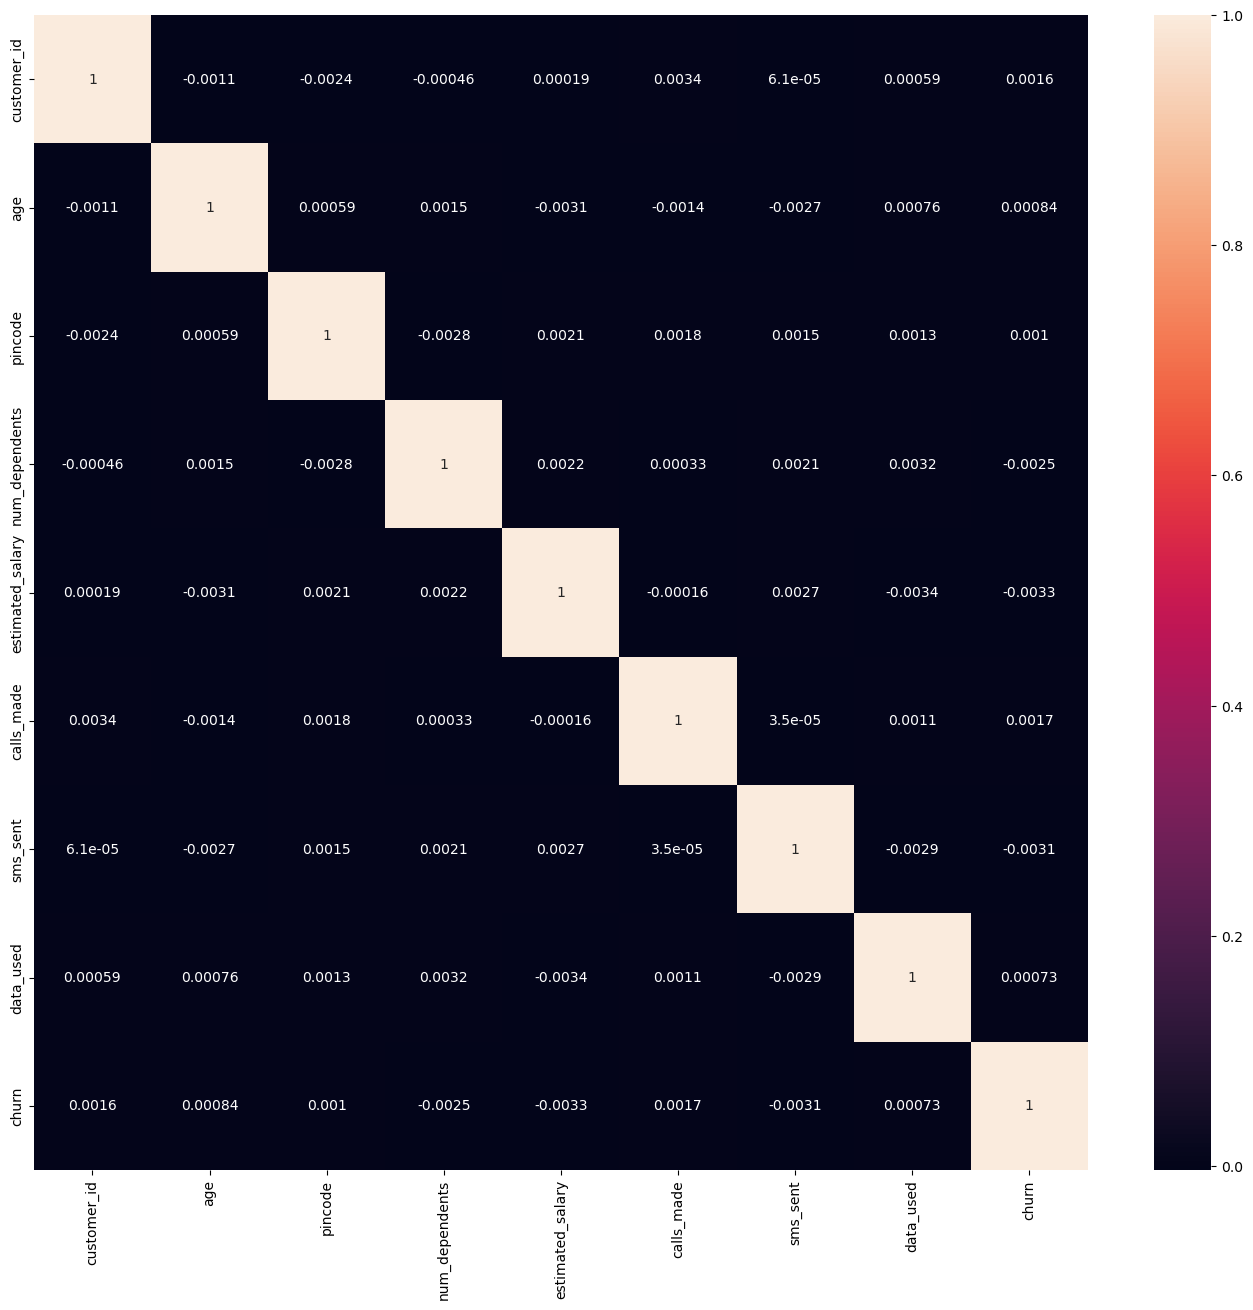

In [9]:
# getting correlation of data
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

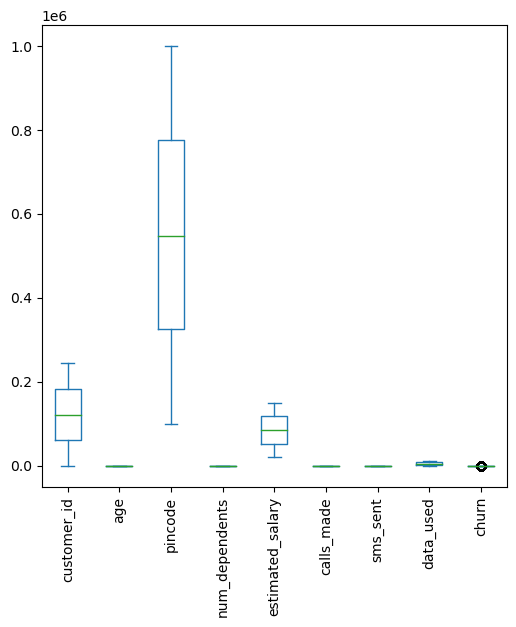

In [10]:
# boxplot to check for outliers
df.plot(kind="box",figsize=(6,6),rot=90)

In [11]:
# checking for outliers
df_num= df.select_dtypes(include=[np.number])

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_num[(df_num < lower_bound) | (df_num > upper_bound)]

In [12]:
outliers=df_num[(df_num<lower_bound)|(df_num>upper_bound)]

In [13]:
# the churn columns contains outliers
outliers.count()

customer_id             0
age                     0
pincode                 0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn               48827
dtype: int64

In [14]:
# cleaning up outliers
for col in df_num.columns:
    col_median = df_num[col].median()
    df_num.loc[df_num[col]<lower_bound[col],col]=col_median
    df_num.loc[df_num[col]>upper_bound[col],col]=col_median

In [15]:
outliers_impute = df_num[(df_num < lower_bound) | (df_num > upper_bound)]

In [16]:
outliers_impute.count()

customer_id         0
age                 0
pincode             0
num_dependents      0
estimated_salary    0
calls_made          0
sms_sent            0
data_used           0
churn               0
dtype: int64

In [17]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [18]:
# deleting "date_of_registration" column
df.drop(columns = "date_of_registration", inplace = True)

<AxesSubplot:>

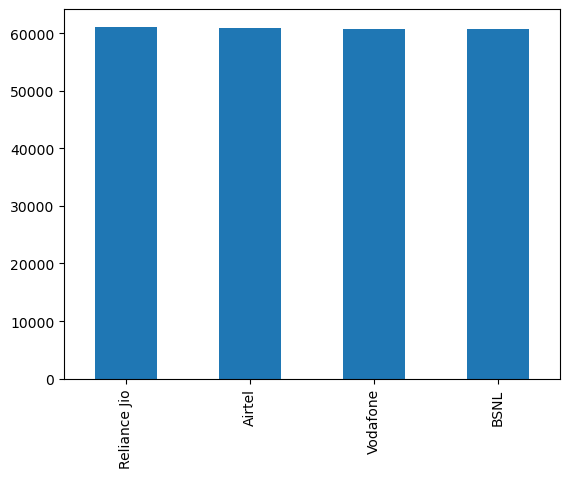

In [19]:
# checking value counts for telecom partner
df['telecom_partner'].value_counts().plot(kind="bar")

<AxesSubplot:>

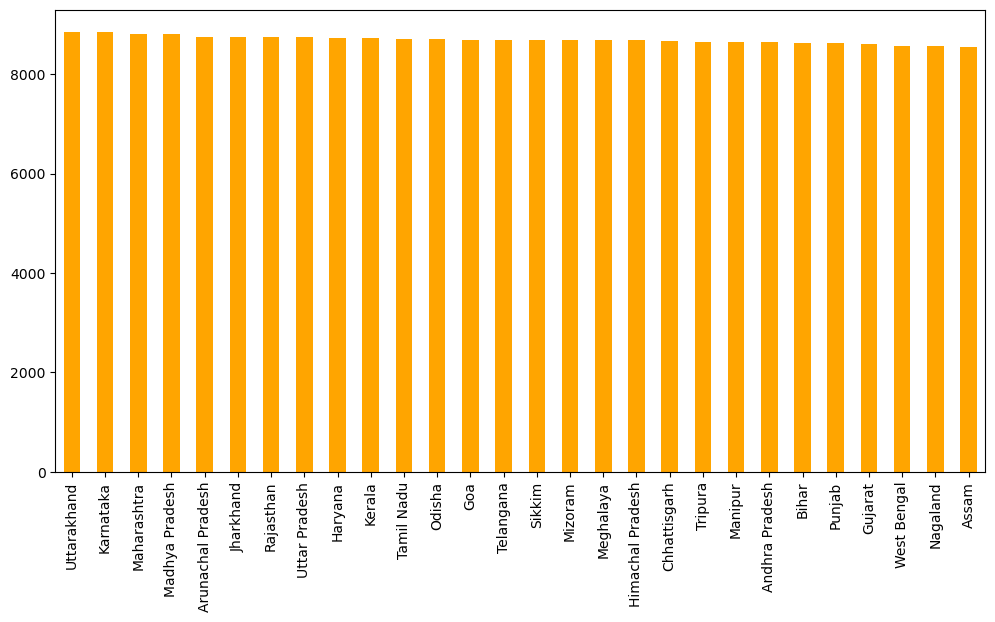

In [26]:
# checking value counts for state
df['state'].value_counts().plot(kind="bar", figsize=(12,6), color="orange")

<AxesSubplot:>

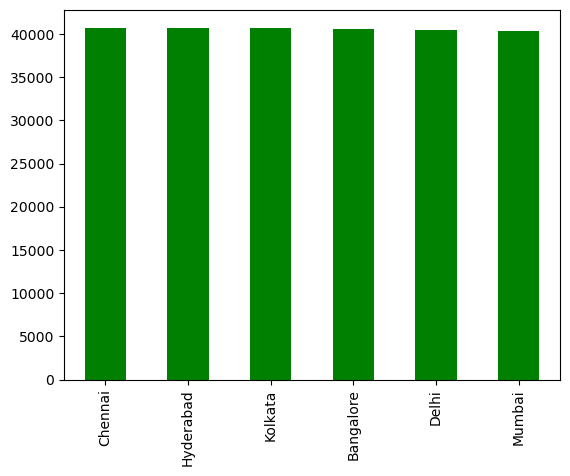

In [28]:
# checking value count for state
df['city'].value_counts().plot(kind="bar", color="green")

In [29]:
# importing LableEncoder for converting object data type into integer
from sklearn.preprocessing import LabelEncoder

In [34]:
cat_cols = ['telecom_partner', 'city', 'state', 'gender']

In [35]:
label_encoder = LabelEncoder()

In [36]:
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [37]:
df.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,2,0,25,2,4,755597,4,124962,44,45,-361,0
1,2,2,0,55,8,5,125926,2,130556,62,39,5973,0
2,3,3,0,57,1,2,423976,0,148828,49,24,193,1
3,4,1,1,46,15,4,522841,1,38722,80,25,9377,1
4,5,1,0,26,17,2,740247,2,55098,78,15,1393,0


In [38]:
# churn is target column
x = df.drop(columns = "churn")
y = df["churn"]

In [39]:
x.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used
0,1,2,0,25,2,4,755597,4,124962,44,45,-361
1,2,2,0,55,8,5,125926,2,130556,62,39,5973
2,3,3,0,57,1,2,423976,0,148828,49,24,193
3,4,1,1,46,15,4,522841,1,38722,80,25,9377
4,5,1,0,26,17,2,740247,2,55098,78,15,1393


In [40]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: churn, dtype: int64

In [41]:
# importing Logistic regression model
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [44]:
model.fit(x,y)

LogisticRegression()

In [46]:
model.score(x,y)

0.7995220752772497

# Logistic Accuracy score for Churn Prediction data is: 0.7995220752772497